In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
file_one_df = pd.read_csv(mouse_drug_data_to_load, encoding="ISO-8859-1")
file_two_df = pd.read_csv(clinical_trial_data_to_load, encoding="ISO-8859-1")
    
# Combine the data into a single dataset
merge_df = pd.merge(file_one_df, file_two_df, on="Mouse ID")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and convert to DataFrame
drug_time_df = merge_df.groupby(['Drug', 'Timepoint']).mean().reset_index()

# Remove extra columns
drop_drug_time_df = drug_time_df.drop(["Metastatic Sites"], axis=1)

# Preview DataFrame
drop_drug_time_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint and convert to DataFrame
sem_drug_time_df = merge_df.groupby(['Drug', 'Timepoint']).sem().reset_index()

# Remove extra columns
drop_sem_drug_time_df = sem_drug_time_df.drop(["Mouse ID", "Metastatic Sites"], axis=1)

# Preview DataFrame
drop_sem_drug_time_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
rf_drug_time_df = drop_drug_time_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
rf_drug_time_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


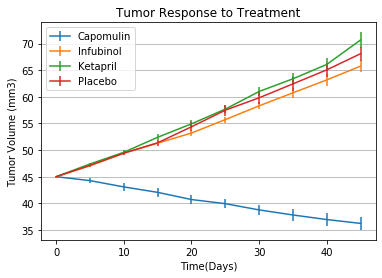

In [109]:
# Generate the Plot (with Error Bars)
tumor_response_index = drop_drug_time_df.set_index(['Drug','Timepoint']).sort_index()
error_tumor_index = drop_sem_drug_time_df.set_index(['Drug', 'Timepoint']).sort_index()

def tumor_reponse(drug):
    response_data = tumor_response_index.loc[drug]
    error_response_data = error_tumor_index.loc[drug]

    plt.errorbar(response_data.index, response_data.values, yerr=error_response_data.values)    
    plt.legend(drugs)
    plt.title("Tumor Response to Treatment")
    plt.xlabel("Time(Days)")
    plt.ylabel("Tumor Volume (mm3)")

drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

for drug in drugs:
    tumor_reponse(drug)

plt.grid(axis='y')


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Remove extra columns from drug_time_df
met_drug_time_df = drug_time_df.drop(["Tumor Volume (mm3)"], axis=1)

# Preview DataFrame
met_drug_time_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Remove extra columns from sem_drug_time_df
met_sem_drug_time_df = sem_drug_time_df.drop(["Tumor Volume (mm3)", "Mouse ID"], axis=1)

# Preview DataFrame
met_sem_drug_time_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
rf_met_drug_time_df = met_drug_time_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
rf_met_drug_time_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


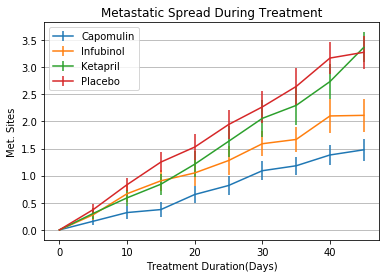

In [110]:
# Generate the Plot (with Error Bars)

# Show the Figure

met_response_index = met_drug_time_df.set_index(['Drug', 'Timepoint']).sort_index()
met_sem_response_index = met_sem_drug_time_df.set_index(['Drug', 'Timepoint']).sort_index()

def metastatic_response(drug):
    metastatic_data = met_response_index.loc[drug]
    sem_metastatic_data = met_sem_response_index.loc[drug]
    
    plt.errorbar(metastatic_data.index, metastatic_data.values, yerr=sem_metastatic_data.values)
    plt.legend(drugs)
    plt.title("Metastatic Spread During Treatment")
    plt.xlabel("Treatment Duration(Days)")
    plt.ylabel("Met. Sites")
    
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

for drug in drugs:
    metastatic_response(drug)

plt.grid(axis='y')

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint and Convert to DataFrame
survival_df = merge_df.groupby(['Drug', 'Timepoint']).count().reset_index()
count_survival_df = survival_df.drop(["Tumor Volume (mm3)", "Metastatic Sites"], axis=1)
count_survival_df = count_survival_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
count_survival_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
rf_count_survive_df = count_survival_df.pivot_table('Mouse Count', ['Timepoint'], 'Drug')

# Preview the Data Frame
rf_count_survive_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


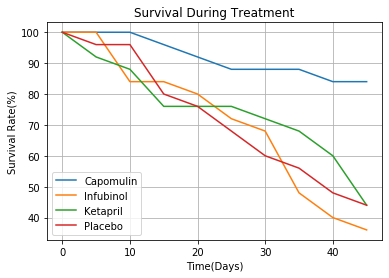

In [112]:
# Generate the Plot (Accounting for percentages)

# Show the Figure

start_mice = 25
count_survival_df['Percent'] = count_survival_df['Mouse Count'] / start_mice * 100
percent_survival_df = count_survival_df.drop(['Mouse Count'], axis=1)
    
survival_index = percent_survival_df.set_index(['Drug', 'Timepoint']).sort_index()

def survival_response(drug):
    survival_data = survival_index.loc[drug]
    
    plt.plot(survival_data.index, survival_data.values)
    plt.legend(drugs)
    plt.title("Survival During Treatment")
    plt.xlabel("Time(Days)")
    plt.ylabel("Survival Rate(%)")

    
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']    
#drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

for drug in drugs:
    survival_response(drug)

plt.grid()

## Summary Bar Graph

In [45]:
# Calculate the percent changes for each drug
start_tumor = 45
end_tumor = rf_drug_time_df.query('Timepoint == ["45"]')
change = end_tumor - start_tumor
percent_change = change / start_tumor * 100

# Display the data to confirm
percent_change.iloc[0]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

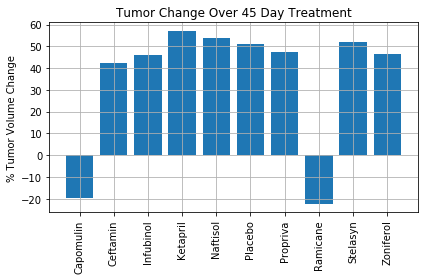

In [106]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Show the Figure

change = percent_change.iloc[0]
select_drugs = change.index 
select_change = change.values

x_axis = np.arange(len(select_drugs))

ticks = [value for value in x_axis]

plt.xticks(ticks, change.index, rotation='90')
plt.bar(x_axis, select_change, align="center")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.tight_layout()
plt.grid()

In [ ]:
# Observations

# Capomulin and Ramicane are the only two drugs that have any significant effects on the growth and spread of tumors in the study
# 78% of the drugs tested had similar treatment results as the placebo
# No drug completely stopped the tumor spread, even the most effective drugs only reduced the spread